## **Cuaderno demo: Panda, Numpy, MatPlotLib, funciones anónimas y carga de ficheros**

24_25


# Erik Santana Montelongo

# Introducción a Numpy y Panda

Web: [Numpy](https://numpy.org/)

Web: [Pandas](https://pandas.pydata.org/)

Web: [Matplotlib](https://matplotlib.org/)

Web: [Scipy](https://scipy.org/)

Web: [Scikit-learn](https://scikit-learn.org/stable/)

In [38]:
import matplotlib
# CARGAMOS LIBRERIAS
# ==============================================================================
# Importamos la librería NUMPY para CÁLCULO NUMÉRICO Y ANÁLISIS DE DATOS
import numpy as np
# PANDAS para MANIPULACIÓN y ANÁLISIS DE DATOS
import pandas as pd
# MATPLOTLIB para GRAFICOS
import matplotlib.pyplot as plt
# SCIPY para CÁLCULO MATEMÁTICO
import scipy # necesario para conocer la versión
import scipy.stats as st
# Preprocesado
#==============================================================================
import sklearn # necesario para conocer la versión
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_selector
# Versiones
#==============================================================================
version_np = np.version.version
version_pd = pd.__version__
version_plt = matplotlib.__version__
version_scipy = scipy.__version__
version_sklearn = sklearn.__version__


**Creación de objetos:**

1.   Objeto array (numpy)
2.   Objeto DataFrame (pandas)



**Objeto array** Todos los datos del mismo tipo (dtype)

In [39]:
# creación de una matriz de números floats
x=np.array([[1.,2,3, 4],[5,6,7,8],[9,10,11,12]])
x

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6.,  7.,  8.],
       [ 9., 10., 11., 12.]])

In [40]:
# tipo de datos
x.dtype

dtype('float64')

In [41]:
# array con contenido de cadenas
x_txt=np.array([['a','b','c'],['d','e','f'],['g','h','i']])
x_txt.dtype # <U1 --> Significa tipo de dato unicode de longitud 1


dtype('<U1')

In [42]:
# Acceso a elementos x[filas,columnas]
# Atención: empieza a numerar desde el 0
x[0,0]

1.0

In [43]:
# También se puede utilizar
x[0][0]

1.0

In [44]:
# Columna 2
x[:,1]

array([ 2.,  6., 10.])

In [45]:
# Ejer 1: Mostrar la columa 4
x[:,3]

array([ 4.,  8., 12.])

In [46]:
# Fila 2
x[1,:]

array([5., 6., 7., 8.])

In [47]:
#Ejer 2: mostrar la fila 1
x[0,:]

array([1., 2., 3., 4.])

In [48]:
# Extraer la submatriz columnas 2 y 4
x_new=x[:,[1,3]]
x_new

array([[ 2.,  4.],
       [ 6.,  8.],
       [10., 12.]])

In [49]:
#Ejer 3: Extraer la submatriz de las filas 1 y 3
x_news=x[:,[0,2]]
x_news

array([[ 1.,  3.],
       [ 5.,  7.],
       [ 9., 11.]])

**Definición 1:** Crear un dataframe directamente

**¿Qué es un dataframe?**

Un DataFrame es una estructura de datos con dos dimensiones en la cual se puede guardar datos de distintos tipos (como caractéres, enteros, valores de punto flotante, factores y más) en columnas. Es similar a una hoja de cálculo o una tabla de SQL o el data.frame de R. Un DataFrame siempre tiene un índice (con inicio en 0). El índice refiere a la posición de un elemento en la estructura de datos.

Título: [Comenzando con datos](https://datacarpentry.org/python-ecology-lesson-es/02-starting-with-data/)


**Objeto DataFrame** Las columnas de la tabla pueden tener diferentes *dtype*

In [50]:
# Definición de DataFrame
df=pd.DataFrame(
    {"A": 1.0,
     "B": pd.Categorical(["H","H","H","M","M"]),
     "C": np.array([1., 2., 3., 4., 5.]),
    }
)

In [51]:
# visualización del objeto DataFrame df
df

,A,B,C
0,1.0,H,1.0
1,1.0,H,2.0
2,1.0,H,3.0
3,1.0,M,4.0
4,1.0,M,5.0


In [15]:
df.dtypes

,0
A,float64
B,category
C,float64


In [52]:
#Resumen estadística basica descriptiva
df.describe()

,A,C
count,5.0,5.000000
mean,1.0,3.000000
std,0.0,1.581139
min,1.0,1.000000
25%,1.0,2.000000
50%,1.0,3.000000
75%,1.0,4.000000
max,1.0,5.000000


In [17]:
#Ejer 4: crear un dataframe con una lista (ficticia) de municipios de Gran canaria y el número de habitantes separados por géneros (Masculino, Femenino, etc...)

data = {
    "Municipio": ["Las Palmas de Gran Canaria", "Telde", "San Bartolomé de Tirajana", "Arucas", "Gáldar"],
    "Masculino": [180000, 42000, 25000, 15000, 13000],
    "Femenino": [190000, 45000, 26000, 16000, 14000],
    "Otros": [500, 100, 50, 30, 20]
}

# Crear el DataFrame
dfs = pd.DataFrame(data)

# Agregar una columna con el total de habitantes
dfs["Total"] = df["Masculino"] + df["Femenino"] + df["Otros"]

# Mostrar el DataFrame
print(dfs)

                    Municipio  Masculino  Femenino  Otros   Total
0  Las Palmas de Gran Canaria     180000    190000    500  370500
1                       Telde      42000     45000    100   87100
2   San Bartolomé de Tirajana      25000     26000     50   51050
3                      Arucas      15000     16000     30   31030
4                      Gáldar      13000     14000     20   27020


In [18]:
#Ejer 5: Mostrar los tipos de datos asociados a cada columna
print(dfs.dtypes)

Municipio    object
Masculino     int64
Femenino      int64
Otros         int64
Total         int64
dtype: object


In [19]:
#Ejer 6: modificar uno o más valores de una de las columnas

# Cambiar el valor de hombres en "Telde" a 50000
dfs.loc[df["Municipio"] == "Telde", "Masculino"] = 50000

# Cambiar el valor en una celda usando índices (fila 3 columna "Femenino")
dfs.at[3, "Femenino"] = 17000

print(dfs)


                    Municipio  Masculino  Femenino  Otros   Total
0  Las Palmas de Gran Canaria     180000    190000    500  370500
1                       Telde      50000     45000    100   87100
2   San Bartolomé de Tirajana      25000     26000     50   51050
3                      Arucas      15000     17000     30   31030
4                      Gáldar      13000     14000     20   27020


In [20]:
#Ejer 7: Cambiar alguno de los valores de forma directa
# Cambiar el valor en la fila 2 (San Bartolome de Tirajana) a 80
dfs.at[2, "Otros"] = 80

# Cambiar el valor en la fila 0 (Las Palmas de Gran Canaria) a 195000
dfs.iloc[0, df.columns.get_loc("Femenino")] = 195000

print(df)

                    Municipio  Masculino  Femenino  Otros   Total
0  Las Palmas de Gran Canaria     180000    195000    500  370500
1                       Telde      50000     45000    100   87100
2   San Bartolomé de Tirajana      25000     26000     80   51050
3                      Arucas      15000     17000     30   31030
4                      Gáldar      13000     14000     20   27020


In [27]:
#Ejer 8: Obtener estadística basica descriptiva

estadisticas = dfs.describe()
print(estadisticas)


          Masculino       Femenino       Otros          Total
count       5.00000       5.000000    5.000000       5.000000
mean    56600.00000   59400.000000  146.000000  113340.000000
std     70535.80651   76761.318384  200.698779  145710.265424
min     13000.00000   14000.000000   20.000000   27020.000000
25%     15000.00000   17000.000000   30.000000   31030.000000
50%     25000.00000   26000.000000   80.000000   51050.000000
75%     50000.00000   45000.000000  100.000000   87100.000000
max    180000.00000  195000.000000  500.000000  370500.000000


**Definición 2**: a partir de un objeto array (creado con numpy) crear un dataframe

In [22]:
# creamos 70 fechas consecutivas iniciando en el día 10-sep-2022, (en inglés, 20220910)
fechas = pd.date_range("20220910", periods=70)
fechas

DatetimeIndex(['2022-09-10', '2022-09-11', '2022-09-12', '2022-09-13',
               '2022-09-14', '2022-09-15', '2022-09-16', '2022-09-17',
               '2022-09-18', '2022-09-19', '2022-09-20', '2022-09-21',
               '2022-09-22', '2022-09-23', '2022-09-24', '2022-09-25',
               '2022-09-26', '2022-09-27', '2022-09-28', '2022-09-29',
               '2022-09-30', '2022-10-01', '2022-10-02', '2022-10-03',
               '2022-10-04', '2022-10-05', '2022-10-06', '2022-10-07',
               '2022-10-08', '2022-10-09', '2022-10-10', '2022-10-11',
               '2022-10-12', '2022-10-13', '2022-10-14', '2022-10-15',
               '2022-10-16', '2022-10-17', '2022-10-18', '2022-10-19',
               '2022-10-20', '2022-10-21', '2022-10-22', '2022-10-23',
               '2022-10-24', '2022-10-25', '2022-10-26', '2022-10-27',
               '2022-10-28', '2022-10-29', '2022-10-30', '2022-10-31',
               '2022-11-01', '2022-11-02', '2022-11-03', '2022-11-04',
      

In [23]:
# x-> datos, index-> nombre de filas (es la forma con la que se podrán identificar cada fila), colums-> nombre de columnas
# Generamos una matriz de 70 filas por 2 columnas de números aleatorios "normales" (Distribución normal)
# de media 0 y desviación típica 1
df_fechas = pd.DataFrame(np.random.randn(70, 2),index=fechas,columns=["col1","col2"])
df_fechas

,col1,col2
2022-09-10,-1.460446,1.168231
2022-09-11,0.540774,0.463092
2022-09-12,1.004673,-0.238182
2022-09-13,-0.395699,0.946259
2022-09-14,1.665143,0.285059
...,...,...
2022-11-14,-0.528183,-0.752202
2022-11-15,-1.020224,1.385541
2022-11-16,-0.147317,-0.433521
2022-11-17,1.030371,-1.164046


In [24]:
# Metodos objeto.metodo df.< TAB >
# Ejemplos: situate al final del comando + barra espaciadora
#           df.head() primeros registros
#           df.tail() ultimos registros
#           df.index() nombre de las filas
#           df.columns()  nombre de las columnas
#           df.describe() estadística basica descriptiva
#           df.T() transpuesta
df_fechas.describe()

,col1,col2
count,70.000000,70.000000
mean,-0.085401,-0.188558
std,0.933014,0.899693
min,-1.937596,-1.864062
25%,-0.763264,-0.965792
50%,-0.102033,-0.253146
75%,0.603454,0.406568
max,2.094924,2.124553


In [28]:
#Ejer 9: realizar un ejemplo de cada uno de los siguientes comandos
#           df_fechas.head() primeros registros
#           df_fechas.tail() ultimos registros
#           df_fechas.index nombre de las filas
#           df_fechas.columns  nombre de las columnas
#           df_fechas.describe() estadística basica descriptiva
#           df_fechas.T transpuesta

print("Primeros registros:")
print(df_fechas.head())

print("\nÚltimos registros:")
print(df_fechas.tail())

print("\nNombres de las filas:")
print(df_fechas.index)

print("\nNombres de las columnas:")
print(df_fechas.columns)

print("\nEstadística basica descriptiva:")
print(df_fechas.describe())

print("\nTranspuesta:")
print(df_fechas.T)

Primeros registros:
                col1      col2
2022-09-10 -1.460446  1.168231
2022-09-11  0.540774  0.463092
2022-09-12  1.004673 -0.238182
2022-09-13 -0.395699  0.946259
2022-09-14  1.665143  0.285059

Últimos registros:
                col1      col2
2022-11-14 -0.528183 -0.752202
2022-11-15 -1.020224  1.385541
2022-11-16 -0.147317 -0.433521
2022-11-17  1.030371 -1.164046
2022-11-18 -1.449991 -0.974153

Nombres de las filas:
DatetimeIndex(['2022-09-10', '2022-09-11', '2022-09-12', '2022-09-13',
               '2022-09-14', '2022-09-15', '2022-09-16', '2022-09-17',
               '2022-09-18', '2022-09-19', '2022-09-20', '2022-09-21',
               '2022-09-22', '2022-09-23', '2022-09-24', '2022-09-25',
               '2022-09-26', '2022-09-27', '2022-09-28', '2022-09-29',
               '2022-09-30', '2022-10-01', '2022-10-02', '2022-10-03',
               '2022-10-04', '2022-10-05', '2022-10-06', '2022-10-07',
               '2022-10-08', '2022-10-09', '2022-10-10', '2022-10-11


**Selección de registros**

*   Por etiquetas
*   Por posición
*   Por condición booleana








In [29]:
# Selección de columnas (variable)
# Varias columnas df[["col1","col2"]]
df_fechas[["col2"]]


,col2
2022-09-10,1.168231
2022-09-11,0.463092
2022-09-12,-0.238182
2022-09-13,0.946259
2022-09-14,0.285059
...,...
2022-11-14,-0.752202
2022-11-15,1.385541
2022-11-16,-0.433521
2022-11-17,-1.164046


In [30]:
# Selección de filas
# del 01 al 31 de octubre
df_fechas["20221001":"20221031"]

,col1,col2
2022-10-01,-0.159632,-1.331496
2022-10-02,0.786578,-0.141520
2022-10-03,0.404946,2.124553
2022-10-04,-0.086027,0.894442
2022-10-05,-0.318282,1.220329
2022-10-06,-0.762204,1.052919
2022-10-07,0.363429,-1.017838
2022-10-08,-0.439387,-0.032960
2022-10-09,-0.976232,-0.462817
2022-10-10,-0.153505,0.323360


In [31]:
# Selección de submatriz (slice)
# Método .loc selección por etiquetas
df_fechas.loc["20220920":"20220930", ["col1", "col2"]]


,col1,col2
2022-09-20,0.216457,0.158483
2022-09-21,-0.087298,-1.206402
2022-09-22,-1.937596,-0.996366
2022-09-23,0.337506,-0.343869
2022-09-24,-0.841279,-1.144561
2022-09-25,0.897342,0.531293
2022-09-26,-0.843495,0.493464
2022-09-27,-1.850234,0.461552
2022-09-28,0.814047,-1.797989
2022-09-29,1.066113,0.418507


In [32]:
# Selección por posición
# df.iloc[filas, columnas]
# df.iloc[ posiciones 1, 2, 3 , 4, posiciones 0]
# df.iloc[ filas 2, 3, 4, 5, columna 1]
df.iloc[1:5, 0:1]

,Municipio
1,Telde
2,San Bartolomé de Tirajana
3,Arucas
4,Gáldar


In [53]:
# Selección por condición booleana
# Nos quedamos con los datos que tienen un valor positivo en la columna indicada
df1=df[df["C"]>3]
df1

,A,B,C
3,1.0,M,4.0
4,1.0,M,5.0


**El método apply**: se combina una funcionalidad de Numpy en un objeto dataframe

In [54]:
# aplicamos la función suma acumulada definida en numpy a nuestros datos (dataframe)
df_fechas.apply(np.cumsum)

,col1,col2
2022-09-10,-1.460446,1.168231
2022-09-11,-0.919672,1.631324
2022-09-12,0.085001,1.393141
2022-09-13,-0.310698,2.339400
2022-09-14,1.354445,2.624459
...,...,...
2022-11-14,-4.390936,-12.012848
2022-11-15,-5.411159,-10.627307
2022-11-16,-5.558476,-11.060829
2022-11-17,-4.528105,-12.224875


**Definición de funciones anónimas**

In [55]:
# La función x toma el argumento a, le suma 10 y lo devuelve
mi_funcion_anonima = lambda a : a + 10
print(mi_funcion_anonima(5))

15


In [56]:
mi_funcion_anonima_1 = lambda a, b : a * b
print(mi_funcion_anonima_1(5, 6))

30


In [57]:
df['C']

,C
0,1.0
1,2.0
2,3.0
3,4.0
4,5.0


In [58]:
df['C'].max()

5.0

In [59]:
df['C'].min()

1.0

In [61]:
#Ejer 10: Crear una función anónima denomminada mi_funcion_rango, que pasándole por parámetro la columna "C" de df obtenga el rango
#      de los valores que forman parte de dicha columna
funcion_rango = lambda col: col.max() - col.min()

# Rango de la columna "C"
rango_c = funcion_rango(df["C"])

print("Rango de la columna C:", rango_c)

Rango de la columna C: 4.0


A continuación tenemos unos accesos que nos permitiran conocer de forma rápida las librerías de Matplotlib y Pandas

[introducción rápida a Matplotlib](https://aprendeconalf.es/docencia/python/manual/matplotlib/#integraci%C3%B3n-con-pandas)

[Introducción rápida a Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)

# **Ya podemos empezar**

In [63]:

# Descargar el dataset que se utilizará utilizaNdo un enlace compartido de google drive
# Si la URL es https://drive.google.com/file/d/IDFICHEROCOMPARTIDO se debe utilizar:
# !gdown --id IDFICHEROCOMPARTIDO
# En nuestro caso, hemos de hacer uso de parte de la información que hay en el siguiente enlace, que corresponde
# con elenlace cunado se comparte un fichero:
#
# https://drive.google.com/file/d/18vnxFKW097DjW5TMR8sYHG-nYfGmkqj5/view?usp=sharing
#
# Este comando Linux, solo funciona en Google Colab, no en local
# Con la exclamación ! ejecutamos un comando (programa) Linux que se ejecuta en la máquina virtual
!gdown --id 18vnxFKW097DjW5TMR8sYHG-nYfGmkqj5
#
# Ignorar el mensaje que se muestra al ejecutarse, indicando que el comando -id is deprecated
#
# Una vez ha sido descargado a nuestros recursos de  Google Colab, como recurso de este cuaderno, es interesante descargarlo
# y abrirlo con alguna herramienta  ono Notepad++ o LibreOffice


/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=18vnxFKW097DjW5TMR8sYHG-nYfGmkqj5
To: /content/datos.csv
100% 427/427 [00:00<00:00, 1.83MB/s]


In [64]:
# Cargamos el fichero csv  denominado datos.csv con
Datos= pd.read_csv('datos.csv', delimiter=';')
# importante--> OBSERVAR que Datos es un DataFrame como el df que se ha trabajado anteriormente
# Mostrar filas y columnas de la matriz de datos
Datos.shape

(19, 3)

In [65]:
# Mostramos el contenido de los datos (variables)
# Contiene la renta media en 2020 por comunidades y la variación de rentas (en porcentajes) respecto al año anterior
Datos

,Comunidad,Renta,DiferenciaRenta
0,ANDALUCIA,17747,-9.1
1,ARAGON,26512,-7.8
2,ASTURIAS,21149,-9.0
3,BALEARS,22048,-22.7
4,CANARIAS,17448,-18.4
5,CANTABRIA,22096,-9.3
6,CASTILLA Y LEON,23167,-7.0
7,CASTILLA Y LA MANCHA,19369,-7.1
8,CATALUNYA,27812,-10.9
9,VALENCIA,20792,-9.9


In [66]:
# Mostramos las comunidades autónomas
Datos["Comunidad"]

,Comunidad
0,ANDALUCIA
1,ARAGON
2,ASTURIAS
3,BALEARS
4,CANARIAS
5,CANTABRIA
6,CASTILLA Y LEON
7,CASTILLA Y LA MANCHA
8,CATALUNYA
9,VALENCIA


In [67]:
# Le cambiamos el nombre de la comunidad de CANARIAS a Islas Canarias
Datos.iloc[4,0]='Islas Canarias'

Datos


,Comunidad,Renta,DiferenciaRenta
0,ANDALUCIA,17747,-9.1
1,ARAGON,26512,-7.8
2,ASTURIAS,21149,-9.0
3,BALEARS,22048,-22.7
4,Islas Canarias,17448,-18.4
5,CANTABRIA,22096,-9.3
6,CASTILLA Y LEON,23167,-7.0
7,CASTILLA Y LA MANCHA,19369,-7.1
8,CATALUNYA,27812,-10.9
9,VALENCIA,20792,-9.9


In [68]:
#Ejer 11: Volver a cambiar a CANARIAS
Datos.iloc[4,0]= 'CANARIAS'
Datos

,Comunidad,Renta,DiferenciaRenta
0,ANDALUCIA,17747,-9.1
1,ARAGON,26512,-7.8
2,ASTURIAS,21149,-9.0
3,BALEARS,22048,-22.7
4,CANARIAS,17448,-18.4
5,CANTABRIA,22096,-9.3
6,CASTILLA Y LEON,23167,-7.0
7,CASTILLA Y LA MANCHA,19369,-7.1
8,CATALUNYA,27812,-10.9
9,VALENCIA,20792,-9.9


In [69]:
Datos.describe()

,Renta,DiferenciaRenta
count,19.000000,19.000000
mean,22795.684211,-9.726316
std,4542.137982,4.164245
min,17448.000000,-22.700000
25%,19464.000000,-10.150000
50%,21903.000000,-8.600000
75%,26113.000000,-7.450000
max,32048.000000,-5.200000


**Objeto matriz de numpy**

In [70]:
# Transformamos una parte del objeto DataFrame a un objeto matriz para trabajar con métodos de numpy
DatosMatriz=Datos[["Renta", "DiferenciaRenta"]].to_numpy()
DatosMatriz

# Por curiosidad, fijarse como los datos de Canarias coinciden en la fila (al igual que el resto de los datos...)


array([[ 1.7747e+04, -9.1000e+00],
       [ 2.6512e+04, -7.8000e+00],
       [ 2.1149e+04, -9.0000e+00],
       [ 2.2048e+04, -2.2700e+01],
       [ 1.7448e+04, -1.8400e+01],
       [ 2.2096e+04, -9.3000e+00],
       [ 2.3167e+04, -7.0000e+00],
       [ 1.9369e+04, -7.1000e+00],
       [ 2.7812e+04, -1.0900e+01],
       [ 2.0792e+04, -9.9000e+00],
       [ 1.8301e+04, -5.2000e+00],
       [ 2.1903e+04, -8.1000e+00],
       [ 3.2048e+04, -1.1100e+01],
       [ 1.9838e+04, -8.1000e+00],
       [ 2.9314e+04, -8.5000e+00],
       [ 3.0401e+04, -1.0400e+01],
       [ 2.5714e+04, -8.6000e+00],
       [ 1.9559e+04, -6.7000e+00],
       [ 1.7900e+04, -6.9000e+00]])

**Visualizar DatosMatriz**

In [71]:
DatosMatriz

array([[ 1.7747e+04, -9.1000e+00],
       [ 2.6512e+04, -7.8000e+00],
       [ 2.1149e+04, -9.0000e+00],
       [ 2.2048e+04, -2.2700e+01],
       [ 1.7448e+04, -1.8400e+01],
       [ 2.2096e+04, -9.3000e+00],
       [ 2.3167e+04, -7.0000e+00],
       [ 1.9369e+04, -7.1000e+00],
       [ 2.7812e+04, -1.0900e+01],
       [ 2.0792e+04, -9.9000e+00],
       [ 1.8301e+04, -5.2000e+00],
       [ 2.1903e+04, -8.1000e+00],
       [ 3.2048e+04, -1.1100e+01],
       [ 1.9838e+04, -8.1000e+00],
       [ 2.9314e+04, -8.5000e+00],
       [ 3.0401e+04, -1.0400e+01],
       [ 2.5714e+04, -8.6000e+00],
       [ 1.9559e+04, -6.7000e+00],
       [ 1.7900e+04, -6.9000e+00]])

**Cálculo de la media y desviación típica**

In [72]:
np.mean(DatosMatriz,axis=0) # Calcula la media aritmetica de los datos,
                      # (por columnas) axis=1 para calcular la media por filas

array([ 2.27956842e+04, -9.72631579e+00])

**Librería matplotlib: Histograma**

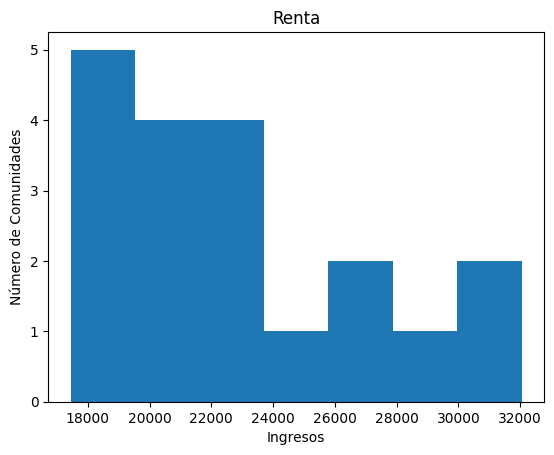

In [73]:
# Para mostrar en el histograma los datos de ingresos hemos de indicar que queremos todas las filas de la primera columna
plt.hist(DatosMatriz[:,0],7 ) # recordar, columna 0 = primera variable y el 7 indica el número de grupos(columnas) a mostrar
#plt.hist(DatosMatriz[:,0]) # recordar, columna 0 = primera variable
plt.ylabel('Número de Comunidades')
plt.xlabel('Ingresos')
plt.title('Renta')
plt.show()

In [76]:
#Ejer 12: Filtrando los datos en el dataframe Datos, identificar las comunidades autónomas cuya renta
#      Apartado 1: Renta entre 26000€ y 28000€
comunidades_renta_26000_28000 = Datos[(Datos['Renta'] >= 26000) & (Datos['Renta'] <= 28000)]
print(comunidades_renta_26000_28000)

#      Apartado 2: Renta superior a 30000€
comunidades_renta_superior_30000 = Datos[Datos['Renta'] > 30000]
print(comunidades_renta_superior_30000)


   Comunidad  Renta  DiferenciaRenta
1     ARAGON  26512             -7.8
8  CATALUNYA  27812            -10.9
     Comunidad  Renta  DiferenciaRenta
12      MADRID  32048            -11.1
15  PAIS VASCO  30401            -10.4


¿Y si queremos visualizar la diferencia de ingresos?

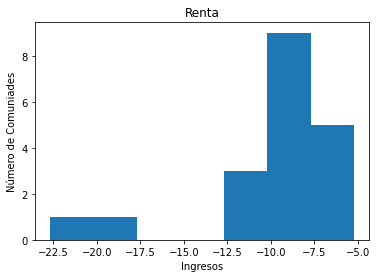

In [ ]:
plt.hist(DatosMatriz[:,1],7 ) # columna 1 = segunda variable
plt.ylabel('Número de Comuniades')
plt.xlabel('Ingresos')
plt.title('Renta')
plt.show()



# Vamos a analizar los datos de muestra de las comunidades autónomas para la Detección de **outliers**
Adaptación del cuaderno **Ejemplo 2.3 Outliers.ipynb**

In [ ]:
Ingresos=DatosMatriz[:,0] # Ingresos medios
datos=Ingresos # para reutilizar el código

**MÉTODO 1:**  Basado en la distribución normal

In [ ]:
# CRITERIO 1: PROBABILIDAD GLOBAL
# probabilidad de la muestra de estar dentro de las bandas
p_g=0.95
# probabilidad global de una cola
alfa_g=(1-p_g)/2
# probabilidad  de las colas para un solo dato
alfa= 1-(1-alfa_g)**(1/len(datos))
## CRITERIO 2:  Criterio Chauvenet
#alfa=1/(2*len(datos))
Z_alfa=st.norm.ppf(1-alfa/2)
# Impresión de resultados
alfa=round(alfa,5)
Z_alfa=round(Z_alfa,5)# k
print(f" Alfa ={alfa}")
print(f" CUANTIL Z_(1-alfa/2) ={Z_alfa}")

 Alfa =0.00133
 CUANTIL Z_(1-alfa/2) =3.20907


In [ ]:
xL=  round(np.mean(datos)-Z_alfa*  np.std(datos),4)
xU=  round(np.mean(datos)+Z_alfa*  np.std(datos),4)
print(f" Banda= [ {xL},{xU}]")

 Banda= [ 8608.4099,36982.9585]


In [ ]:
# No hay ninguna comunidad outlier respecto a los ingresos
for i in  range(len(datos)):
        if datos[i] < xL  or datos[i]>xU:
          print(f" El dato[{i}]={datos[i]} es un outlier")


**MÉTODO 2:**  Basado en la distancia entre cuartiles

In [ ]:
Q1 = np.quantile(datos,0.25)
Q3 = np.quantile(datos,0.75)
IQR = Q3 - Q1
k=1.5
xL=Q1 - k * IQR
xU=Q3 + k * IQR
outlier=np.array([]) # almacenamiento de las posiciones de los outliers
for i in  range(len(datos)):
        if datos[i] < xL  or datos[i]>xU:
          print(f" El dato[{i}]={datos[i]} es un outlier")
          outlier=np.concatenate((outlier,np.array([i])))

**¿Qué comunidades son?**

In [ ]:
Datos.loc[outlier,"Comunidad"]

Series([], Name: Comunidad, dtype: object)

# Aplicamos las técnicas de **escalameniento de datos** a la información que tenemos de las comunidades autónomas

Adaptación del cuaderno **Ejemplo 2.5 Escalamiento de datos.**ipynb

In [ ]:
Datos

,Comunidad,Renta,DiferenciaRenta
0,ANDALUCIA,17747,-9.1
1,ARAGON,26512,-7.8
2,ASTURIAS,21149,-9.0
3,BALEARS,22048,-22.7
4,CANARIAS,17448,-18.4
5,CANTABRIA,22096,-9.3
6,CASTILLA Y LEON,23167,-7.0
7,CASTILLA Y LA MANCHA,19369,-7.1
8,CATALUNYA,27812,-10.9
9,VALENCIA,20792,-9.9


In [ ]:
# Escalamiento
# ==============================================================================
# Selección de columnas numéricas tipo doble o enteras
numeric_cols = Datos.select_dtypes(include=['float64', 'int']).columns.to_list()
# Standard scaler
preprocessor_SS = ColumnTransformer(
                   [('scale', StandardScaler(), numeric_cols)],remainder='passthrough')

# MinMaxScaler
preprocessor_MM = ColumnTransformer(
                   [('scale', MinMaxScaler(), numeric_cols)],remainder='passthrough')

Datos_prep_SS = preprocessor_SS.fit_transform(Datos)
Datos_prep_MM = preprocessor_MM.fit_transform(Datos)
# Nota:
# Se podría aplicar las transformaciones a cualquier conjunto de datos con
# Data_new_prep_SS  = preprocessor_SS.transform(Data_new)

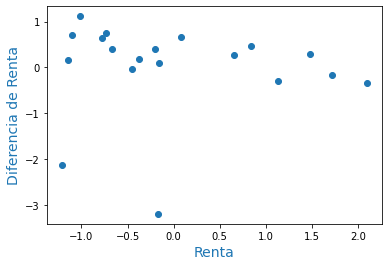

In [ ]:
# Representación de las dos variables escaladas z-score
fig, ax = plt.subplots()
ax.scatter(Datos_prep_SS[:,0], Datos_prep_SS[:,1])
ax.set_xlabel("Renta", fontdict = {'fontsize':14,  'color':'tab:blue'})
ax.set_ylabel("Diferencia de Renta",fontdict = {'fontsize':14,  'color':'tab:blue'})
plt.show()


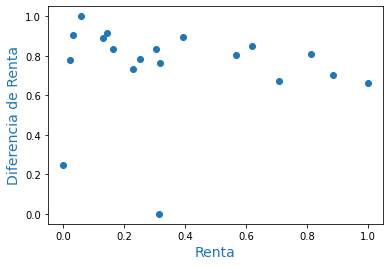

In [ ]:
# Representación de las variables escaladas Min-Max
fig, ax = plt.subplots()
ax.scatter(Datos_prep_MM[:,0], Datos_prep_MM[:,1])
ax.set_xlabel("Renta", fontdict = {'fontsize':14,  'color':'tab:blue'})
ax.set_ylabel("Diferencia de Renta",fontdict = {'fontsize':14,  'color':'tab:blue'})
plt.show()

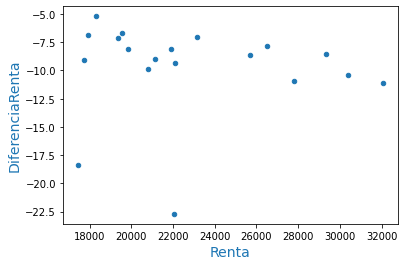

In [ ]:
# Dibujar los datos originales. Integración de matplotlib con pandas
# df.plot
fig, ax = plt.subplots()
ax.set_xlabel("Renta", fontdict = {'fontsize':14,  'color':'tab:blue'})
ax.set_ylabel("Diferencia de Renta",fontdict = {'fontsize':14,  'color':'tab:blue'})
Datos.plot(kind='scatter', x='Renta', y='DiferenciaRenta',ax=ax)